In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Clonacion**

In [ ]:
!git clone https://github.com/meituan/YOLOv6.git
%cd YOLOv6
%pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3838, done.
remote: Total 3838 (delta 0), reused 0 (delta 0), pack-reused 3838 (from 1)
Receiving objects: 100% (3838/3838), 43.99 MiB | 52.19 MiB/s, done.
Resolving deltas: 100% (2297/2297), done.
/content/YOLOv6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━

A diferencia del yolov3 y yolov4 que se cargaban manualmente las direcciones, en este caso solo es necesario crear un archivo .yaml, en donde este contiene, el numero de clases, la etiqueta y las direcciones de los archivos.

La estrcutra esperada para los archivos para los entrenamientos es la siguiente:

  dataset

---


    --train
      --images
      --label
    --val
      --images
      --label

In [ ]:
data_yaml = """
train: /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/train
val: /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/val

nc: 1
names: ["0"]
"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)

In [ ]:

!python tools/train.py --data data.yaml --img 640 --batch 32 --epochs 100 --conf-file configs/yolov6s.py --device 0 --name entrenamiento_v6

Se han truncado las últimas 5000 líneas del flujo de salida.
  with amp.autocast(enabled=self.device != 'cpu'):
/content/YOLOv6/yolov6/models/losses/loss.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
     71/99    0.00214    0.5973         0    0.7323:   5%|▌         | 2/39 [00:0/content/YOLOv6/yolov6/core/engine.py:150: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(enabled=self.device != 'cpu'):
/content/YOLOv6/yolov6/models/losses/loss.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
     71/99    0.00214    0.5896         0    0.7274:   8%|▊         | 3/39 [00:0/content/YOLOv6/yolov6/core/engine.py:150: FutureWarning: `torch.cuda.a

In [ ]:
!ls runs/detect


Se carga la imagen sin etiqueta para validar el funcionamiento del modelo (Se cambia la ruta por la imagen cargada)

In [ ]:
!python tools/infer.py --weights /content/YOLOv6/runs/train/entrenamiento_v61/weights/best_ckpt.pt --source /content/video_39_frame_0000.jpg --device cpu


Namespace(weights='/content/YOLOv6/runs/train/entrenamiento_v61/weights/best_ckpt.pt', source='/content/video_39_frame_0000.jpg', webcam=False, webcam_addr='0', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='cpu', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/entrenamiento_v61/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00,  2.56it/s]
Results saved to runs/inference/exp


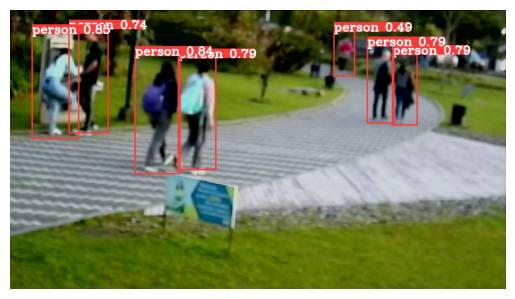

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Cambia esta ruta si se generó otro directorio (como exp1, exp2, etc.)
img = cv2.imread('/content/YOLOv6/runs/inference/exp/video_39_frame_0000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
!python tools/infer.py --weights /content/YOLOv6/runs/train/entrenamiento_v61/weights/best_ckpt.pt --source /content/video_41_frame_0000.jpg --device cpu

Namespace(weights='/content/YOLOv6/runs/train/entrenamiento_v61/weights/best_ckpt.pt', source='/content/video_41_frame_0000.jpg', webcam=False, webcam_addr='0', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='cpu', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/entrenamiento_v61/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00,  5.08it/s]
Results saved to runs/inference/exp


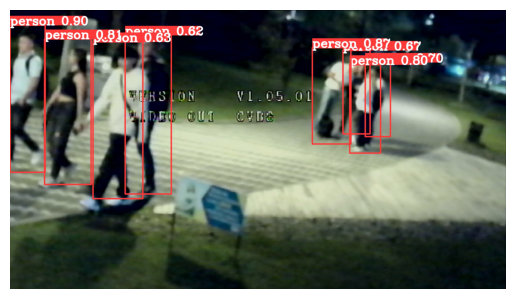

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Cambia esta ruta si se generó otro directorio (como exp1, exp2, etc.)
img = cv2.imread('/content/YOLOv6/runs/inference/exp/video_41_frame_0000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()


Esta celda es unicamente para descarga de archivos en caso de que no se deje descargar directamente los weight o los .pt

In [ ]:
from google.colab import files
files.download('/content/YOLOv6/runs/train/entrenamiento_v61/weights/last_ckpt.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>